In [1]:
# Cell 1: Library Imports and Configurations
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

# Configure visuals and warnings
plt.style.use('ggplot')
sb.set_palette('muted')
warnings.simplefilter('ignore')

# Print versions
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")


Pandas Version: 2.2.2
Numpy Version: 1.26.4


In [2]:
# Cell 2: Verify Dataset Directory and List Contents
data_root = Path(r"C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset")

if data_root.exists():
    print(f"✅ Directory exists: {data_root}\n")
    files_in_dir = list(data_root.glob("*"))
    print("Files available:")
    for f in files_in_dir:
        print(f"- {f.name}")
        
    csvs = [f.name for f in files_in_dir if f.suffix == ".csv"]
    print(f"\nCSV Files Found: {csvs if csvs else 'None'}")
else:
    print(f"❌ Directory does not exist: {data_root}")


✅ Directory exists: C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset

Files available:
- test
- train
- val

CSV Files Found: None


In [3]:
# Cell 3: Traverse Subfolders and Summarize Contents
splits = ['train', 'test', 'val']

for split in splits:
    split_dir = data_root / split
    print(f"\n{'='*40}\nExploring {split.upper()} Folder\n{'='*40}")
    
    if split_dir.exists():
        items = sorted(split_dir.iterdir())
        print(f"Total Items: {len(items)}\nDetails:")
        
        for idx, item in enumerate(items, 1):
            if item.is_dir():
                files_inside = len(list(item.glob("*")))
                print(f"  {idx}. {item.name}/ — {files_inside} files")
            else:
                print(f"  {idx}. {item.name} — File")
        
        if items:
            print(f"\nPreviewing First Few Subfolders in {split.upper()}:")
            for folder in items[:5]:
                if folder.is_dir():
                    previews = [f.name for f in folder.glob("*")][:3]
                    print(f"  {folder.name}/ -> {previews}")
    else:
        print(f"❌ Folder Missing: {split_dir}")



Exploring TRAIN Folder
Total Items: 10
Details:
  1. Battery/ — 240 files
  2. Keyboard/ — 240 files
  3. Microwave/ — 240 files
  4. Mobile/ — 240 files
  5. Mouse/ — 240 files
  6. PCB/ — 240 files
  7. Player/ — 240 files
  8. Printer/ — 240 files
  9. Television/ — 240 files
  10. Washing Machine/ — 240 files

Previewing First Few Subfolders in TRAIN:
  Battery/ -> ['battery_0.jpg', 'battery_1.jpg', 'battery_10.jpg']
  Keyboard/ -> ['Keyboard_0.jpg', 'Keyboard_1.jpg', 'Keyboard_10.jpg']
  Microwave/ -> ['Microwave_0.jpg', 'Microwave_1.jpg', 'Microwave_10.jpg']
  Mobile/ -> ['Mobile_0.jpg', 'Mobile_1.jpg', 'Mobile_10.jpg']
  Mouse/ -> ['Mouse_0.jpg', 'Mouse_1.jpg', 'Mouse_10.jpg']

Exploring TEST Folder
Total Items: 10
Details:
  1. Battery/ — 30 files
  2. Keyboard/ — 30 files
  3. Microwave/ — 30 files
  4. Mobile/ — 30 files
  5. Mouse/ — 30 files
  6. PCB/ — 30 files
  7. Player/ — 30 files
  8. Printer/ — 30 files
  9. Television/ — 30 files
  10. Washing Machine/ — 30 files



In [4]:
# Cell 4: Compute Summary for Each E-Waste Category
categories = ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 
              'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']

summary = {
    'Category': [],
    'Train': [],
    'Test': [],
    'Validation': [],
    'Total': []
}

for cat in categories:
    t_path = data_root / 'train' / cat
    tst_path = data_root / 'test' / cat
    v_path = data_root / 'val' / cat
    
    t_count = len(list(t_path.glob("*"))) if t_path.exists() else 0
    tst_count = len(list(tst_path.glob("*"))) if tst_path.exists() else 0
    v_count = len(list(v_path.glob("*"))) if v_path.exists() else 0
    
    summary['Category'].append(cat)
    summary['Train'].append(t_count)
    summary['Test'].append(tst_count)
    summary['Validation'].append(v_count)
    summary['Total'].append(t_count + tst_count + v_count)

df_info = pd.DataFrame(summary)

print("\n📊 E-WASTE SUMMARY")
print("=" * 50)
print(df_info.to_string(index=False))

total_imgs = df_info['Total'].sum()
print(f"\n🔢 Total Categories: {len(categories)}")
print(f"📦 Total Images: {total_imgs}")
print(f"🧪 Train/Test/Val Split:")
print(f"  Train: {df_info['Train'].sum()} ({df_info['Train'].sum()/total_imgs*100:.1f}%)")
print(f"  Test: {df_info['Test'].sum()} ({df_info['Test'].sum()/total_imgs*100:.1f}%)")
print(f"  Val: {df_info['Validation'].sum()} ({df_info['Validation'].sum()/total_imgs*100:.1f}%)")



📊 E-WASTE SUMMARY
       Category  Train  Test  Validation  Total
        Battery    240    30          30    300
       Keyboard    240    30          30    300
      Microwave    240    30          30    300
         Mobile    240    30          30    300
          Mouse    240    30          30    300
            PCB    240    30          30    300
         Player    240    30          30    300
        Printer    240    30          30    300
     Television    240    30          30    300
Washing Machine    240    30          30    300

🔢 Total Categories: 10
📦 Total Images: 3000
🧪 Train/Test/Val Split:
  Train: 2400 (80.0%)
  Test: 300 (10.0%)
  Val: 300 (10.0%)


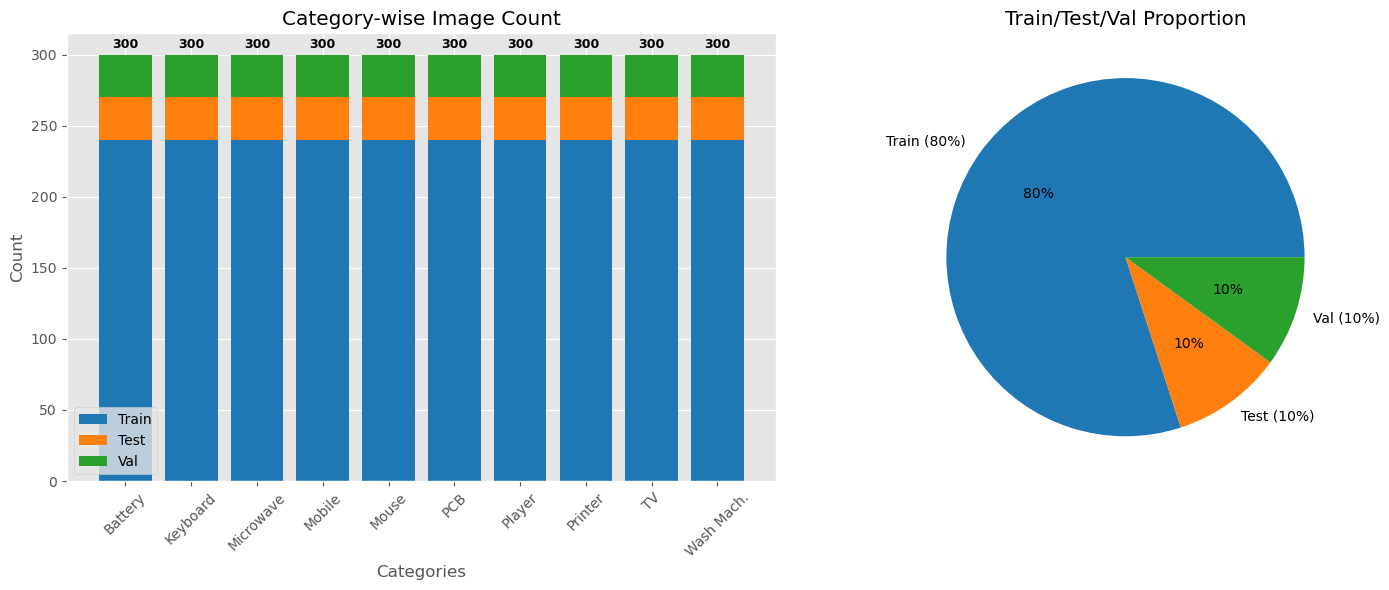

✔️ Visual Summary Complete


In [5]:
# Cell 5: Visual Summary of Dataset Distribution
fig, (b1, b2) = plt.subplots(1, 2, figsize=(15, 6))

x_labels = ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 
            'PCB', 'Player', 'Printer', 'TV', 'Wash Mach.']

t_counts = df_info['Train'].values
ts_counts = df_info['Test'].values
v_counts = df_info['Validation'].values

# Bar Chart
b1.bar(x_labels, t_counts, label='Train', color='#1f77b4')
b1.bar(x_labels, ts_counts, bottom=t_counts, label='Test', color='#ff7f0e')
b1.bar(x_labels, v_counts, bottom=t_counts + ts_counts, label='Val', color='#2ca02c')

for i, total in enumerate(df_info['Total']):
    b1.text(i, total + 5, str(total), ha='center', fontsize=9, weight='bold')

b1.set_title('Category-wise Image Count')
b1.set_xlabel('Categories')
b1.set_ylabel('Count')
b1.legend()
b1.tick_params(axis='x', rotation=45)

# Pie Chart
split_pie = [df_info['Train'].sum(), df_info['Test'].sum(), df_info['Validation'].sum()]
labels_pie = ['Train (80%)', 'Test (10%)', 'Val (10%)']
b2.pie(split_pie, labels=labels_pie, autopct='%1.0f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'])

b2.set_title('Train/Test/Val Proportion')

plt.tight_layout()
plt.show()

print("✔️ Visual Summary Complete")


Battery: (150, 150)
Keyboard: (150, 150)
Microwave: (150, 150)
Mobile: (150, 150)
Mouse: (150, 150)
PCB: (150, 150)
Player: (150, 150)
Printer: (150, 150)
Television: (150, 150)
Washing Machine: (150, 150)


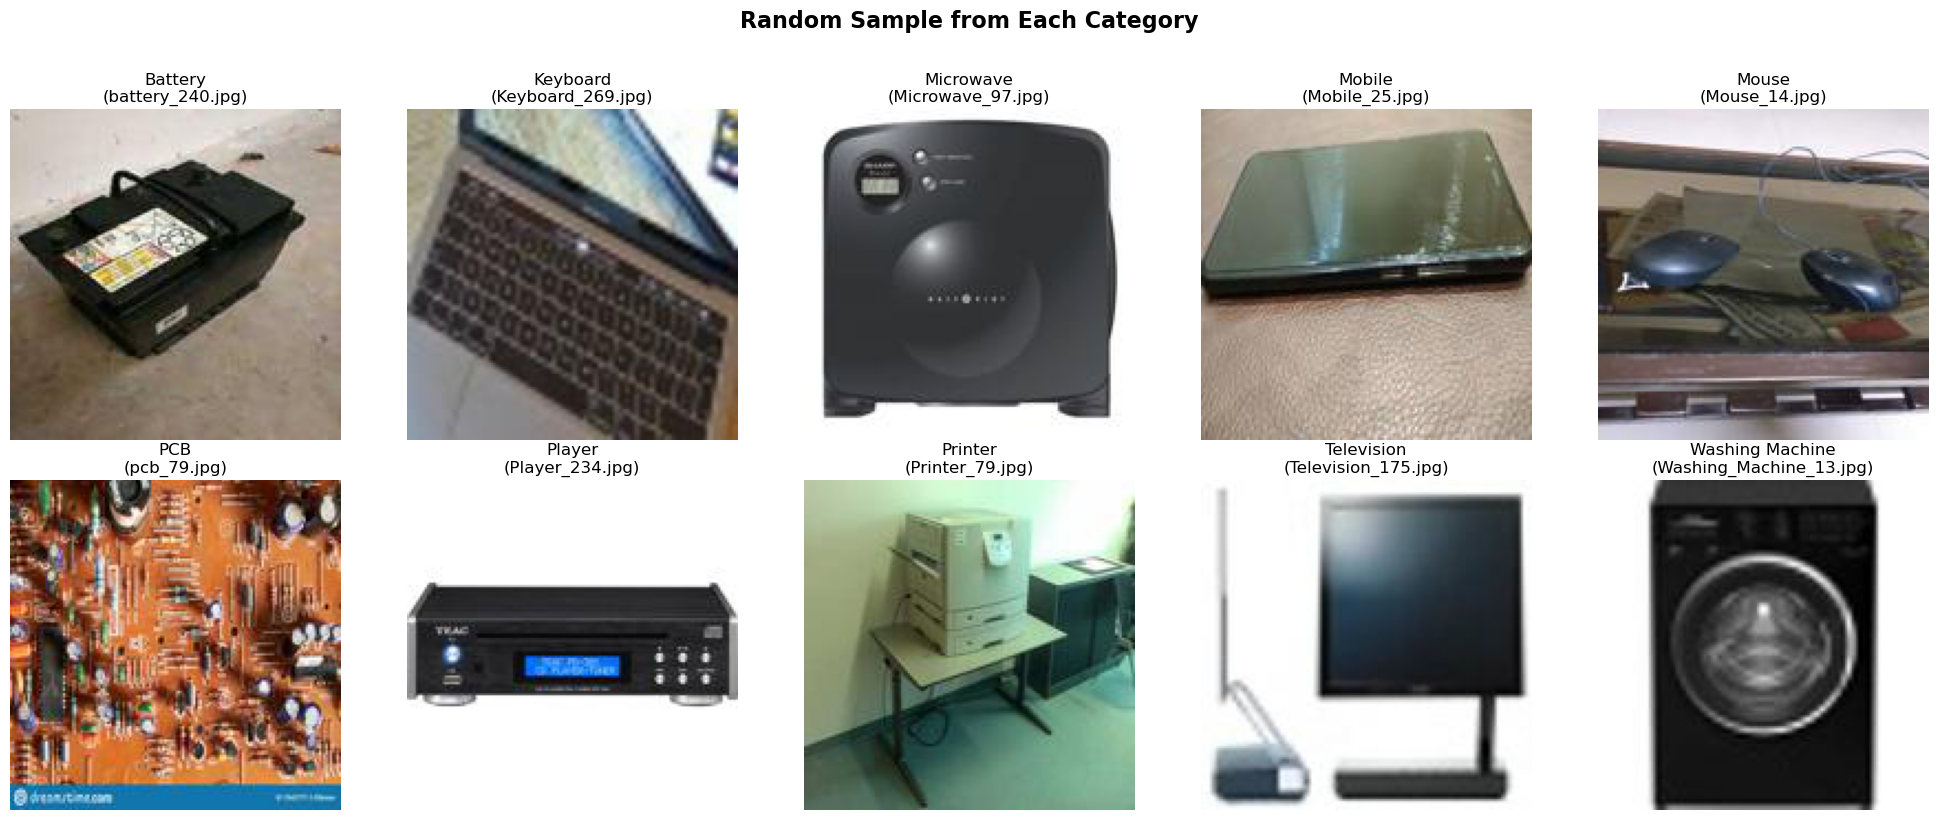

🖼️ Image Preview Completed


In [6]:
# Cell 6: Show Sample Images from Each Category
from PIL import Image
import random

fig, axes_grid = plt.subplots(2, 5, figsize=(20, 8))
axes_grid = axes_grid.flatten()

def pick_random_image(cat, folder='train'):
    cat_path = data_root / folder / cat
    if cat_path.exists():
        all_images = list(cat_path.glob("*"))
        chosen = random.choice(all_images)
        return Image.open(chosen), chosen.name
    return None, None

for idx, cat in enumerate(categories):
    try:
        img_obj, img_name = pick_random_image(cat)
        axes_grid[idx].imshow(img_obj)
        axes_grid[idx].set_title(f"{cat}\n({img_name})", fontsize=12)
        axes_grid[idx].axis('off')
        print(f"{cat}: {img_obj.size}")
    except Exception as err:
        print(f"⚠️ {cat}: Failed to load image — {err}")
        axes_grid[idx].text(0.5, 0.5, f"Error\n{cat}", ha='center', va='center', transform=axes_grid[idx].transAxes)
        axes_grid[idx].axis('off')

plt.suptitle("Random Sample from Each Category", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()
print("🖼️ Image Preview Completed")
